# Machine Learning Concepts for Interviews

The following algorithms are covered:


- <a href='#DeepLearning'>Deep Learning</a>
- <a href='#LinearRegression'>Linear Regression</a>
- <a href='#LogisticRegression'>Logistic Regression</a>
- <a href='#SVD'>Singular Value Decomposition</a>
- <a href='#TimeSeries'>Time Series</a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

%matplotlib inline
%load_ext autoreload

## Dataset

- For the ML algorithms covering classification, we will use the iris dataset from scikit-learn. For simplicity, for the Linear Regression example, we will use the iris dataset as well and consider the target column as continuous (e.g. regression). 

In [36]:
def iris():
    
    """ Load Data -- Iris Dataset"""
    
    X = pd.DataFrame(datasets.load_iris().data,columns=[datasets.load_iris().feature_names])
    y = pd.DataFrame(datasets.load_iris().target,columns=['Species'])

    data = pd.concat([X,y],axis=1)
    data['Species'] = np.where(data['Species'].astype(int) >=1,1,0)
    
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    return(X,y)


X,y = iris()
print(X.shape, y.shape)

# Split Train/Test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70)

(150, 4) (150,)


______
# LogisticRegression 

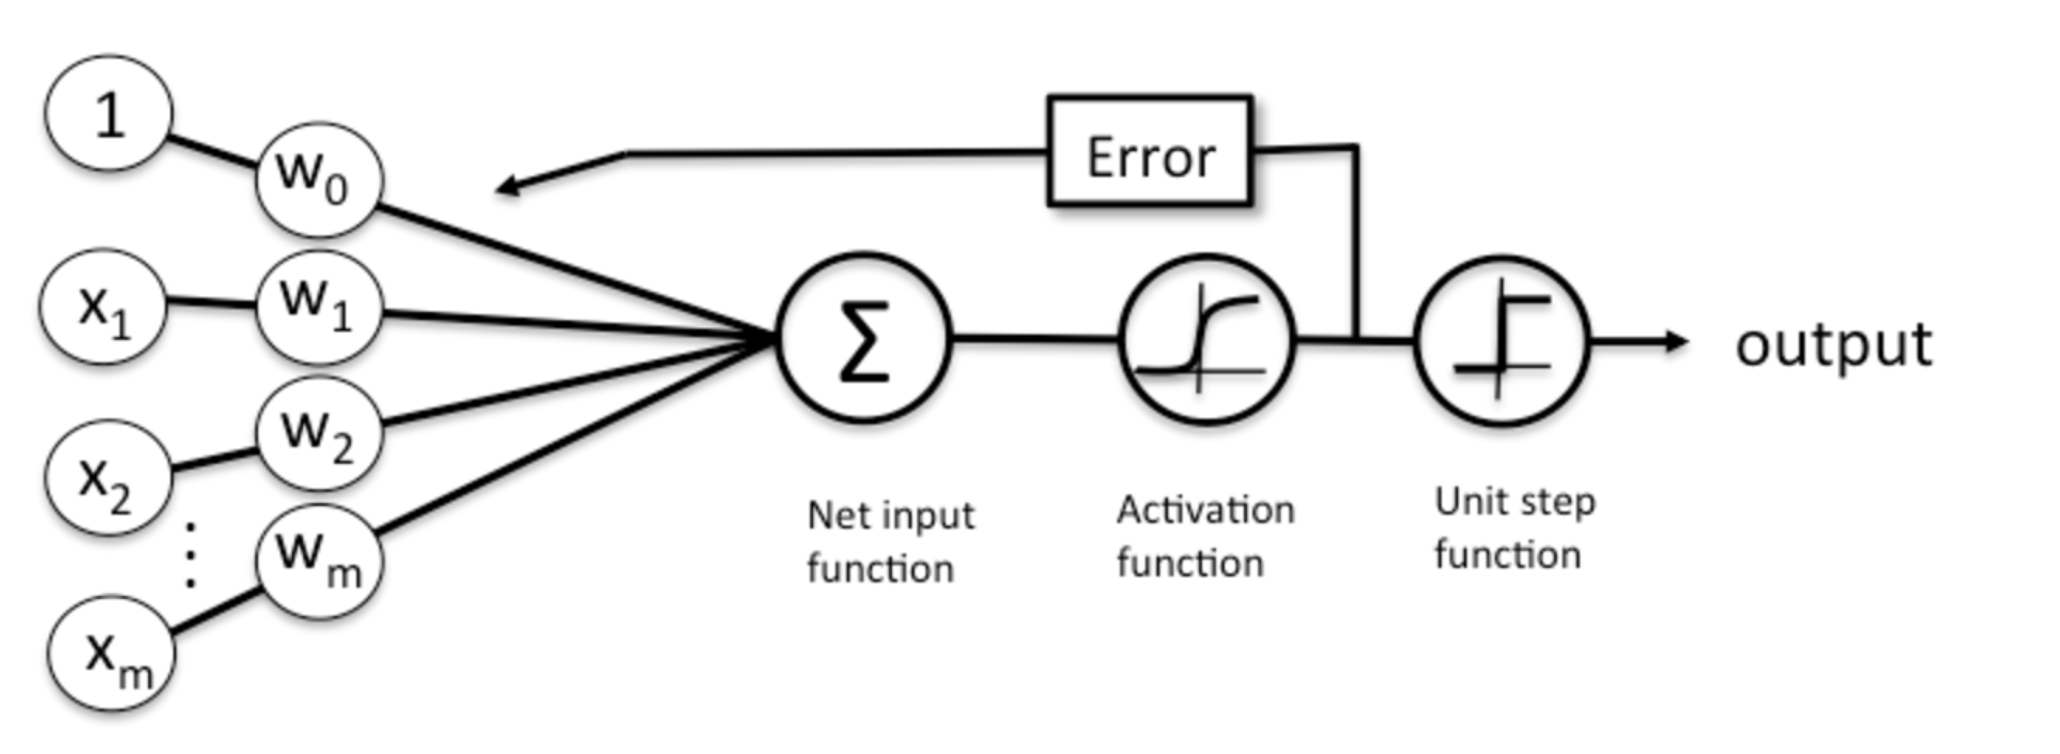

In [2]:
from IPython.display import Image
Image('images/log_reg.png')

___ 

The logistic regression equation maps the input to an output ranging between 0 and 1. Y is denoted as the ground truth and X is denoted as the observed features. The sigmoid activation directly regresses the logistic function for the probability $y=1$. Thus the probability of Y=1 and Y=0 is shown below, respectively:

$$ p(y^{(i)}=1\text{ | }x^{(i)},w)=\frac{1}{1+\exp{(w^T x^{(i)}+b})}$$

$$ p(y^{(i)}=0\text{ | }x^{(i)},w)= 1 - \frac{1}{1+\exp{(w^T x^{(i)}+b})}$$

- Where w is the weight vector of features {X1,X2,...X3}, and b is the bias term

- Note that $w^{T}*X$ is a linear combination of the weights and the attributes:  $b + w_{1}x_{1} + w_{2}x_{2} + ....$


____

The goal is to find a set of weights that minimizes a loss function defined over the training data set. The loss function measures the difference between the ground truth label and the predicted class label. If the prediction is very close to the ground truth label, the loss value will be low. On the other hand, if the prediction is far from the true label, the resulting loss will be high. To update the weights, we will use gradient descent. The process is iterative, so we must calculate the gradient every time w is updated.

**Logistic Cost Function **

$$J({\theta}) = -\frac{1}{m}\sum [y^{(i)}log(h_{\theta}(x^{(i)})) + (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$$

- Differentiating the cost function yields the function below:

** Gradient Descent --  Binary Logistic Regression:** 

$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\sum_{i=1}^M (y^{(i)}-g(x^{(i)}))x^{(i)}_j}_{\text{gradient}} $$

**Where:**

- η: learning rate
- g(⋅): sigmoid function or "logistic function" : $sigmoid = \frac{1}{1+\exp(-t)}$
- $y^{(i)}$: instance of the target
- $ŷ^{(i)}$: an instance of the prediction (for the current value of w)
- $x_{j}^{(i)}$ is the $i^{th}$ instance of the input with the $j^{th}$ feature (that is, the feature in row i and column j)

The dot product of $w^T x^{(i)}$ results in a scalar. Multiplying $w$ and $x^{(i)}$ together returns a single value. Next, place the single value through the sigmoid activation function to compute the probability that $y=1$. 

$$ \hat{y}^{(i)} = 1$$
$$\text{if:    } p(y^{(i)}=1\text{ | }x^{(i)},w) > 0.5  $$ 
$$ \hat{y}^{(i)} = 0  \text{      otherwise} $$

In [43]:
class Logistic_Regression(object):
    
    """Logistic Regression
    
    Keyword arguments:
    eta -- Learning rate (between 0.0 and 1.0)
    n_iter -- Number of passes over the training set
    """
    
    def __init__(self,lr,iterations):
        
        self.learning_rate = lr
        self.iters = iterations

    def sigmoid(self,z):
        
        """ Logistic Sigmoid Function """
        sigmoid = 1 / (1+np.exp(-z))
        return(sigmoid)
    
    def activation(self,X):
        
        """Activation of Logistic Neuron -- Returns Scalar Value"""
        z = np.dot(X,self.weights)
        return(self.sigmoid(z))
    
    def add_bias(self,X):
        
        """ Bias Vector Initialized at Zero with X Features"""        
        return(np.hstack([np.ones((X.shape[0],1)),X]))

    def predict_prob(self,X,alpha=0.50,add_bias=True):
        
        """ Predicted Class Label"""
    
        Xb = self.add_bias(X) if add_bias else X
        pred = np.where(self.activation(Xb) >= alpha,1,0)
        return(pred)
        
    def gradient(self,X,y):
        
        """Compute Gradient"""
        gradient = np.ones(self.weights.shape)
        for x_i,y_i in zip(X,y):
            g = (y_i - self.predict_prob(x_i,add_bias=False))*x_i
            gradient += g.reshape(self.weights.shape)
        
        return(gradient/float(len(y)))

    def fit(self,X,y):
        
        """Fit Model to Training Set"""
        
        print('Original Data Shape: ',X.shape)
        
        #Initialize Weights
        X_bias = self.add_bias(X)
        
        num_obs, num_feats = X_bias.shape
        print('Data with Bias Term: ',X_bias.shape)
        
        #Weights
        self.weights = np.zeros((num_feats,1))
        print('Weight Vector Shape: ',self.weights.shape)
    
        #Iterate and Update Weights
        for i in range(self.iters):

            #Compute Gradient
            gradient = self.gradient(X_bias,y)
            
            #Update Weights
            self.weights += gradient*self.learning_rate

In [30]:
if __name__ == '__main__':

    # Instantiate Logistic Regression Classifier
    clf = Logistic_Regression(lr=0.50,iterations=100)
    
    # Fit Model w/ Training Data
    clf.fit(X_train, y_train)
    
    # Make Predictions
    ypred = clf.predict_prob(X_test)

    # #Accuracy Score
    print('Accuracy Score: {0:.4f}'.format(accuracy_score(ypred,y_test)))

Original Data Shape:  (105, 4)
Data with Bias Term:  (105, 5)
Weight Vector Shape:  (5, 1)
Accuracy Score: 1.0000


_____
# LinearRegression

### Linear Regression with Gradient Descent

- To predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use the following formulas:

- $\hat{Y}=w^Tx^{(i)}$ -> returns a scalar value

- Where $x$ is a matrix with example instances in each instance of the matrix. 

- Objective is to minimize cost function -- "sum squared error": 

$$J(w) = \frac{1}{2}\sum_i(y - w^Tx^{(i)})^2$$

- In matrix notation, the cost function is: 

$$J(w) = \frac{1}{2}(xw-y)^{T}(xw-y)$$

- Differentiating J(w):

$$gradient = 2*\frac{1}{2}x^{T}(xw - y) = 0$$

- Formula for calculating the optimal values of the regression weights:

$$ w = (X^TX)^{-1}X^Ty $$

- Where $X$ is the matrix of values with a bias column of ones appended onto it. For the diabetes dataset one could construct this $X$ matrix by stacking a column of ones onto the `ds.data` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$


In [ ]:
class Linear_Regression(object):
    
    """Linear Regression
    
    Keyword arguments:
    eta -- Learning rate (between 0.0 and 1.0)
    n_iter -- Number of passes over the training set
    """
    
    def __init__(self,lr,iterations=1):
        
        self.learning_rate = lr
        self.iters = iterations
        
    def add_bias(self,X):
        
        """ Bias Vector Initialized at Zero with X Features"""        
        return(np.hstack([np.ones((X.shape[0],1)),X]))

    def predict_prob(self,X,alpha=0.50,add_bias=True):
        
        """ Predicted Class Label"""
    
        Xb = self.add_bias(X) if add_bias else X
        return(np.dot(Xb,self.weights))
        
    def gradient(self,X,y):
        
        """Compute Gradient"""
        gradient = np.ones(self.weights.shape)
        for x_i,y_i in zip(X,y):
            g = (y_i - self.predict_prob(x_i,add_bias=False))*x_i
            gradient += g.reshape(self.weights.shape)
        return(gradient/float(len(y)))

    def fit(self,X,y):
        
        """Fit Model to Training Set"""
        
        print('Original Data Shape: ',X.shape)
        
        #Initialize Weights
        X_bias = self.add_bias(X)
        
        num_obs, num_feats = X_bias.shape
        print('Data with Bias Term: ',X_bias.shape)
        
        #Weights
        self.weights = np.zeros((num_feats,1))
        print('Weight Vector Shape: ',self.weights.shape)
    
        #Iterate and Update Weights
        for i in range(self.iters):

            #Compute Gradient
            gradient = self.gradient(X_bias,y)
            
            #Update Weights
            self.weights += gradient*self.learning_rate

In [56]:
# Instantiate Linear Regression Class
reg = Linear_Regression(lr=0.10)

#Fit Model w/ Training Data
reg.fit(X_train, y_train)

#Make Predictions
ypred = reg.predict_prob(X_test)

# #Accuracy Score
print('MSE: {0:.4f}'.format(mean_squared_error(ypred,y_test)))

Original Data Shape:  (105, 4)
Data with Bias Term:  (105, 5)
Weight Vector Shape:  (5, 1)
MSE: 0.1918


____
## SDV

- Dimensionality Reduction

In [ ]:
def SVD(X):

    print ('=================  SVD  =================')
    
    #Compute AA^T and A^TA Matrices
    try:
        AA_T = np.dot(X,np.transpose(X)) 
        AT_A = np.dot(np.transpose(X),X) 
    
    except:
        print("Unexpected Error:", sys.exc_info()[0])

    #Compute U,S,V.T
    try:
        U = np.linalg.eig(AA_T)[1] #Eigenvectors of XX.T
        S = np.sqrt(np.linalg.eigvals(AT_A)) #Singular Values
        VT = np.linalg.eig(AT_A)[1].T #Eigenvectors of X.TX
    except:
        print("Unexpected Error:", sys.exc_info()[0])
      
    
    #Explained Variance Ratio
    S_ratio = [(i+1,s/np.sum(S)) for i,s in enumerate(sorted(S,reverse=True))]
    for i in S_ratio:
        print('{0:.0f} Component --  Variance Explained {1:.3f}'.format(i[0],i[1]))

    return(U,np.diag(S),VT)

In [49]:
X_std = standardize(X)
U,S,VT = SVD(X_std)

=================  SVD  =================
1 Component --  Variance Explained 0.535
2 Component --  Variance Explained 0.300
3 Component --  Variance Explained 0.120
4 Component --  Variance Explained 0.045


In [50]:
S.shape

(4, 4)

In [51]:
U.shape

(150, 150)

In [52]:
S

array([[20.85320538,  0.        ,  0.        ,  0.        ],
       [ 0.        , 11.67007028,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.6761923 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.75684679]])

_____
# DeepLearning

- Binary Classification example from scratch with regularization added
- Activation function = Sigmoid
- Two Layer network

In [ ]:
from scipy.special import expit

def standardize(X):

    """ Standardize Input Data """
    
    for c in X.columns:
        X[c] = (X[c] - X[c].mean()) / X[c].std()
    return(X)

class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

In [ ]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation """
        
        # backpropagation
        grad1 = np.zeros(W1.shape)
        grad2 = np.zeros(W2.shape)
        
        # for each instance's activations 
        for (a1,a2,a3,y) in zip(A1.T,A2.T,A3.T,Y_enc.T):
            dJ_dz2 = -2*(y - a3)*a3*(1-a3)
            dJ_dz1 = dJ_dz2 @ W2 @ np.diag(a2*(1-a2))
                         
            grad2 += dJ_dz2[:,np.newaxis]  @ a2[np.newaxis,:]
            grad1 += dJ_dz1[1:,np.newaxis] @ a1[np.newaxis,:] 
            # don't incorporate bias term in the z1 gradient 
            # (its added in a2 from another layer)
            

        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * self.l2_C)
        grad2[:, 1:] += (W2[:, 1:] * self.l2_C)

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self

____
## Time Series

- Example of taking converting time series data into a format used for supervised learning (e.g. machine learning algorithms). Here we create a function called `convert_to_supervised` which takes as an input, a pandas DataFrame, and then shift each column by 'n' rows to resemble creating a series of look back windows of lag `n`. If we are using deep learning instead, the DL models expect the input format to be `[samples, timesteps, features]` and therefore the function `gen_sequences` will reshape the input dataframe into the desired tensor shape. 

In [ ]:
def convert_to_supervised(X,lag=1,pred_interval=1,target='pollution'):
    """ Convert to Supervised """
    n_vars = X.shape[1]
    cols,names = [],[]
    
    #Create Lag window for Input Features
    for i in range(lag,0,-1):
        cols.append(X.shift(i))
        names += ['{}_(t-{})'.format(c,i) for c in X.columns]
    
    #Forcast Sequence: --> shift target up for each iteration
    for i in range(0,pred_interval):
        cols.append(X[target].shift(-i))
        if i == 0:
            names += ['yhat_(t)']
        else:
            names += ['yhat_(t+{})'.format(i)]
    
    #Aggregate appended lists to one dataframe
    agg = pd.concat(cols,axis=1)
    agg.columns = names
    
    #Drop NaNa
    agg.dropna(inplace=True)
        
    return(agg)

def gen_sequences(train,test,n_feats,lag,pred_interval):
    """ Generate Sequences """
    
    idx = train.shape[1] - pred_interval 
    X_train, y_train = train.iloc[:,:idx], train.iloc[:,idx:]
    X_test, y_test = test.iloc[:,:idx], test.iloc[:,idx:]

    # Input for LSTM Model: [samples, timesteps, features]
    X_train_seq = X_train.values.reshape(X_train.shape[0],lag, n_feats)
    X_test_seq = X_test.values.reshape(X_test.shape[0],lag, n_feats)
    
    print('Train Sequences: ', X_train_seq.shape)
    print('Test Sequences: ', X_test_seq.shape)
    
    return X_train_seq, X_test_seq, y_train, y_test